# Performance measures

Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.


In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# For plotting like a pro (actually, no)
!pip install -q plotnine
from plotnine import *

In [ ]:
def draw_points_ggplot2(point_set):
  fig = (
    ggplot(data = point_set,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() + 
    xlim(0, 6) +
    ylim(0, 6) +
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
  )
  return(fig)

## Example data

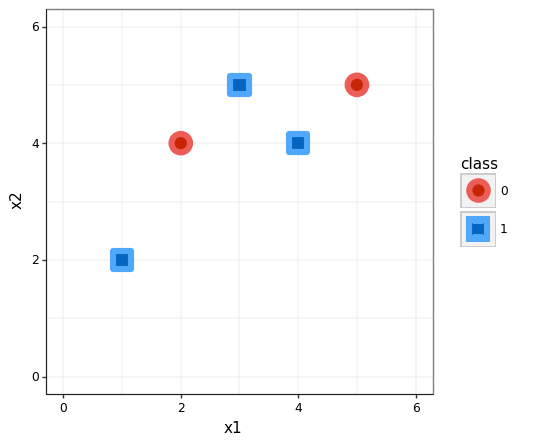

<ggplot: (8742449653861)>

In [ ]:
example_data = pd.DataFrame({'x1':[1,2,3,4,5], 'x2':[2,4,5,4,5], 'class':[1,0,1,1,0]})
example_data['class'] = example_data['class'].astype('category') # note that we turn class into categories
draw_points_ggplot2(example_data)

# Accuracy
What is the accuracy of the random classifier (baseline) for the `example_data`? Is it 50% or more/less? To emulate the random choise we will use a bernoulli trial tossing a fair coin (50% probability of heads/tails) 5 times.

In [ ]:
np.random.seed(1111)

##### YOUR CODE STARTS #####
random_pred = np.random.binomial(1, 0.5, 5)
##### YOUR CODE ENDS #####

acc = np.mean(example_data['class'] == random_pred)*100
print(f'accuracy is {acc}%')

accuracy is 20.0%


Seems very pessimistic, what if we repeat this many times, e.g. 1000?

In [ ]:
np.random.seed(1111)
random_preds = np.zeros(1000)
for i in range(1000):
  random_preds[i] = np.mean(example_data['class'] == np.random.binomial(1, 0.5, 5))*100

print(f'accuracy is {np.mean(random_preds)}%')

accuracy is 50.16%


Here is an unbalanced case:

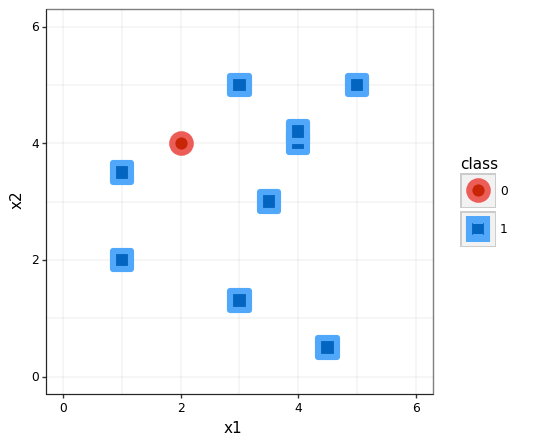

<ggplot: (8742449557957)>

In [ ]:
unbalanced_data = pd.DataFrame({'x1':[1,2,3,4,5,1,4,3,4.5,3.5], 'x2':[2,4,5,4,5,3.5,4.2,1.3,0.5,3], 'class':[1,0,1,1,1,1,1,1,1,1]})
unbalanced_data['class'] = unbalanced_data['class'].astype('category') # note that we turn class into categories
draw_points_ggplot2(unbalanced_data)

Since we increased the number of instances of the blue class, would the accuracy of the random classifier change?

In [ ]:
np.random.seed(1111)
random_preds = np.zeros(1000)
for i in range(1000):
  random_preds[i] = np.mean(unbalanced_data['class'] == np.random.binomial(1, 0.5, 10))*100

print(f'accuracy is {np.mean(random_preds)}%')

accuracy is 50.15%


Instead of binomial trials we can use `DummyClassifier` from `sklearn` to do the same thing.

In [ ]:
from sklearn.dummy import DummyClassifier
random_model = DummyClassifier(strategy='uniform')

In [ ]:
np.random.seed(1111)
random_preds = np.zeros(1000)
for i in range(1000):
  ##### YOUR CODE STARTS #####
  random_model.fit(unbalanced_data[["x1" , "x2"]], unbalanced_data[["class"]])
  random_preds[i] = random_model.score(unbalanced_data[["x1" , "x2"]], unbalanced_data[["class"]])*100
  ##### YOUR CODE ENDS #####

print(f'accuracy is {np.mean(random_preds)}%')

accuracy is 49.96%


But random classifier is not always a good baseline to compare with. As very often it is the majority class predictor who is taking over ML models.

In [ ]:
majority_class_model = DummyClassifier(strategy='most_frequent')
majority_class_model.fit(unbalanced_data[["x1" , "x2"]], unbalanced_data[["class"]])
print(f'{majority_class_model.score(unbalanced_data[["x1" , "x2"]], unbalanced_data[["class"]])*100}%')

90.0%


# Calculate recall and precision for this problem. 
Remind yourself that **recall** is `tp/(tp + fn)` and **precision** is `tp/(tp + fp)`. Where `tp` is true positives, `fn` is false negatives and `fp` is a false positives. What are the positives and negatives? In binary classification, **positives** and **negatives** are arbitrary entities. One of the classes could be called **positive** if it indicates **presence** of some desired (or undesired) outcome (it could be a purchase, disease, etc.). While **negatives** usually indicate absense of this outcome. In our case, since we have `1`-s and `0`-s, we will call `1`-s **positive**, while `0`-s **negatives**. Therefore, a `tp` (true positive) number would reflect the number of `1`-s we predicted as `1`-s etc. Now we are all setup to estimate **precision** and **recall**.

In [ ]:
print(f'True classes for all points: {np.array(unbalanced_data["class"])}')

predictions = majority_class_model.predict(unbalanced_data[["x1" , "x2"]])
print(f'Predicted classes for all points: {np.array(predictions)}')

##### YOUR CODE STARTS #####
# what are the actual classes of points predicted as positive?
pred_positive = np.array(unbalanced_data['class'])[predictions == 1]
print(f'Actual classes of points predicted positive: {pred_positive}')

# what are the actual classes of points predicted as negative?
pred_negative = np.array(unbalanced_data['class'])[predictions == 0]
print(f'Actual classes of points predicted negative: {pred_negative}')
##### YOUR CODE ENDS #####

##### YOUR CODE STARTS #####
tp = np.sum(pred_positive == 1)
fn = np.sum(pred_negative == 1)
fp = np.sum(pred_positive == 0)
tn = np.sum(pred_negative == 0)
##### YOUR CODE ENDS #####

print(f'TP = {tp}, TN = {tn}, FN = {fn}, FP = {fp}')

True classes for all points: [1 0 1 1 1 1 1 1 1 1]
Predicted classes for all points: [1 1 1 1 1 1 1 1 1 1]
Actual classes of points predicted positive: [1 0 1 1 1 1 1 1 1 1]
Actual classes of points predicted negative: []
TP = 9, TN = 0, FN = 0, FP = 1


In [ ]:
precision = tp/(tp + fp)
recall = tp/(tp + fn)

print(f'Recall = {recall}, Precision = {precision}')

Recall = 1.0, Precision = 0.9


**Recall** is how many positives we have prediced as positives out of all positives that were in the data. **Precision** is how many true positives there were among all instances predicted as positive. If you feel that it is confusing, check out formulas again :)

## F1-score
It would be great to have just one number that combines both **precision** and **recall** to look at. Often people use **f1 score** to summarise both precision and recall. 

<center><font size = 6> $ F1 = 2\cdot\frac{(recall\cdot precision)}{(recall + precision)} $

In [ ]:
f1 = 2*(recall*precision)/(recall + precision)
print(f'F1 score = {np.round(f1, 3)}')

F1 score = 0.947


F1-score is also known as Dice-coefficient.

In [ ]:
# Dice coefficient/score
dice = 2*tp/(2*tp + fp + fn)
print(f'Dice score = {np.round(dice, 3)}')

Dice score = 0.947


F1-score calculated using *sklearn*

In [ ]:
from sklearn.metrics import f1_score
f1_score(predictions, unbalanced_data['class'])

0.9473684210526316

**Exercise**: Switch the definitions of **positive** and **negative** and recalculate the precision, recall, f1-score and dice coefficient as if class 0 was considered **positive**. (no need to reverse the `class` variable). Are F1-score and Dice are stil the same?

In [ ]:
predictions # 1 is associated with a negative class now

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
##### YOUR CODE STARTS #####
pred_positive = np.array(unbalanced_data['class'])[predictions == 0]
print(f'Actual classes of points predicted positive: {pred_positive}')

pred_negative = np.array(unbalanced_data['class'])[predictions == 1]
print(f'Actual classes of points predicted negative: {pred_negative}')
##### YOUR CODE ENDS #####

##### YOUR CODE STARTS #####
tp = np.sum(pred_positive == 0)
fn = np.sum(pred_negative == 0)
fp = np.sum(pred_positive == 1)
tn = np.sum(pred_negative == 1)
##### YOUR CODE ENDS #####

print(f'TP = {tp}, TN = {tn}, FN = {fn}, FP = {fp}')

Actual classes of points predicted positive: []
Actual classes of points predicted negative: [1 0 1 1 1 1 1 1 1 1]
TP = 0, TN = 9, FN = 1, FP = 0


In [ ]:
precision = tp/(tp + fp)
recall = tp/(tp + fn)

print(f'Recall = {recall}, Precision = {precision}')

Recall = 0.0, Precision = nan


In [ ]:
f1 = 2*recall*precision/(precision + recall)
print(f'F1 score = {f1}')

F1 score = nan


In [ ]:
# Dice coefficient/score
dice = 2*tp/(2*tp + fp + fn)
print(f'Dice score = {dice}')

Dice score = 0.0


### All you need is ~~love~~ a `classification_report` function from sklearn

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(unbalanced_data['class'], predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



# Confusion matrix
All the values we have calculated so far can be representated as a matrix. We have already seen a confusion matrix before when using **fast.ai** library.

In [ ]:
# let's recalculate our majority class classifier
majority_class_model = DummyClassifier(strategy='most_frequent')
majority_class_model.fit(unbalanced_data[["x1" , "x2"]], unbalanced_data[["class"]])
predictions = majority_class_model.predict(unbalanced_data[["x1" , "x2"]])

As usual, *sklearn* has our backs :)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(unbalanced_data['class'], predictions)

array([[0, 1],
       [0, 9]])

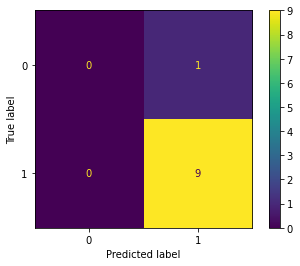

In [ ]:
import matplotlib as plt
metrics.plot_confusion_matrix(majority_class_model, unbalanced_data[['x1', 'x2']], unbalanced_data['class'])

## ROC/AUC
Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC) are some of the most popular performance metrics in machine learning. Here we will practice calculating and visualising ROC/AUC for toy classifier.

In [ ]:
# let's create our data again
example_data = pd.DataFrame({'x1':[1,2,3,4,5], 'x2':[2,4,5,4,5], 'class':[1,0,1,1,0]})
example_data['class'] = example_data['class'].astype('category') # note that we turn class into categories

Train a logistic regression model from *sklearn* on our data

In [ ]:
from sklearn.linear_model import LogisticRegression 
logit = LogisticRegression()
logit.fit(example_data[['x1', 'x2']], example_data[['class']])

LogisticRegression()

Here we will use function `predict_proba` which returns probability scores for each class.

In [ ]:
predictions = logit.predict(example_data[['x1', 'x2']])
print(predictions)

predictions_proba = logit.predict_proba(example_data[['x1', 'x2']])
print(predictions_proba)

[1 1 1 1 0]
[[0.18637182 0.81362818]
 [0.34969782 0.65030218]
 [0.47317578 0.52682422]
 [0.43161108 0.56838892]
 [0.5591435  0.4408565 ]]


In [ ]:
print(predictions_proba[:,1]) # probabilities of positive class

[0.81362818 0.65030218 0.52682422 0.56838892 0.4408565 ]


Let's visualise these probability scores.

In [ ]:
 def generate_grid(start, stop, ppu):
  """
  Function that creates data for the 
  decision boundary visualisation. 
  """
  num_points = (stop - start)*ppu
  x = np.linspace(start, stop, num_points)
  y = np.linspace(start, stop, num_points)
  xx, yy = np.meshgrid(x, y)
  x1, x2 = xx.flatten(), yy.flatten()
  return(pd.DataFrame({'x1':  x1, 'x2': x2}))

In [ ]:
start = 0 
stop = 6
ppu = 30 # points per unit

grid_data = generate_grid(start, stop, ppu)
grid_data['logit'] = logit.predict(grid_data[['x1', 'x2']]) # DEL

print(grid_data.shape)

(32400, 3)


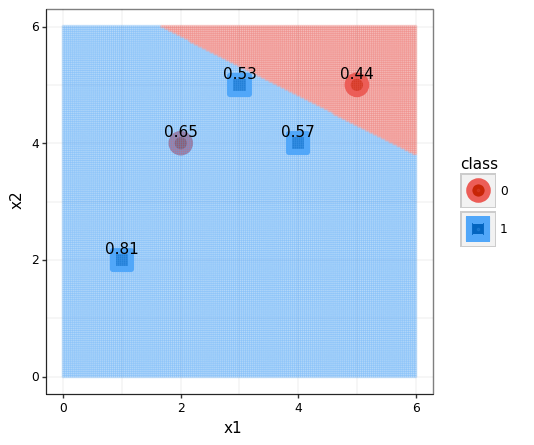

<ggplot: (8742449432369)>

In [ ]:
example_data['scores'] = np.round(predictions_proba[:,1], 2)
draw_points_ggplot2(example_data) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(logit)'),  size = .5, alpha = 0.2) + geom_text(aes(label = example_data['scores']), nudge_y = 0.2)

In [ ]:
example_data

,x1,x2,class,scores
0,1,2,1,0.81
1,2,4,0,0.65
2,3,5,1,0.53
3,4,4,1,0.57
4,5,5,0,0.44


Sort the dataframe in descending order based on class scores

In [ ]:
example_data = example_data.sort_values('scores',  ascending=False)
example_data

,x1,x2,class,scores
0,1,2,1,0.81
1,2,4,0,0.65
3,4,4,1,0.57
2,3,5,1,0.53
4,5,5,0,0.44


What are the possible thresholds in this case?

In [ ]:
thresholds = example_data['scores'].unique()
print(example_data['scores'].unique())

[0.81 0.65 0.57 0.53 0.44]


For each possible threshold compute True Positive Rate (TPR) and False Positive Rate (FPR) and store them in the separate list.

In [ ]:
tprs = []
fprs = []

In [ ]:
for threshold in thresholds:
  print(f'For threshold {threshold}')
  
  ##### YOUR CODE STARTS #####
  predictions = example_data['scores'] >= threshold
  pred_positive = np.array(example_data['class'])[predictions == 1]
  pred_negative = np.array(example_data['class'])[predictions == 0]
  ##### YOUR CODE ENDS #####
  
  tp = np.sum(pred_positive == 1)
  fn = np.sum(pred_negative == 1)
  tn = np.sum(pred_negative == 0)
  fp = np.sum(pred_positive == 0)

  print(f'tp = {tp}, fn = {fn}, tn = {tn}, fp = {fp}')
  
  ##### YOUR CODE STARTS #####
  tpr = tp/(tp + fn) # the same as recall
  fpr = fp/(tn + fp)

  ##### YOUR CODE ENDS #####
  
  print(f'FPR = {np.round(fpr, 2)}, TPR = {np.round(tpr, 2)}\n')
  tprs.append(tpr)
  fprs.append(fpr)

roc_coordinates = pd.DataFrame({'FPR': np.round(fprs, 2), 'TPR': np.round(tprs, 2)}, index=thresholds)
print(roc_coordinates)

For threshold 0.81
tp = 1, fn = 2, tn = 2, fp = 0
FPR = 0.0, TPR = 0.33

For threshold 0.65
tp = 1, fn = 2, tn = 1, fp = 1
FPR = 0.5, TPR = 0.33

For threshold 0.57
tp = 2, fn = 1, tn = 1, fp = 1
FPR = 0.5, TPR = 0.67

For threshold 0.53
tp = 3, fn = 0, tn = 1, fp = 1
FPR = 0.5, TPR = 1.0

For threshold 0.44
tp = 3, fn = 0, tn = 0, fp = 2
FPR = 1.0, TPR = 1.0

      FPR   TPR
0.81  0.0  0.33
0.65  0.5  0.33
0.57  0.5  0.67
0.53  0.5  1.00
0.44  1.0  1.00


Let's also add point FPR = 0, TPR = 0 with threshold 1.0

In [ ]:
# Concat with old DataFrame and reset the Index.
top_row =  pd.DataFrame({'FPR':0, 'TPR':0}, index=[1.0])
final_roc_coordinates = pd.concat([top_row, roc_coordinates])
final_roc_coordinates

,FPR,TPR
1.00,0.0,0.00
0.81,0.0,0.33
0.65,0.5,0.33
0.57,0.5,0.67
0.53,0.5,1.00
0.44,1.0,1.00


Let's visualise our ROC curve:

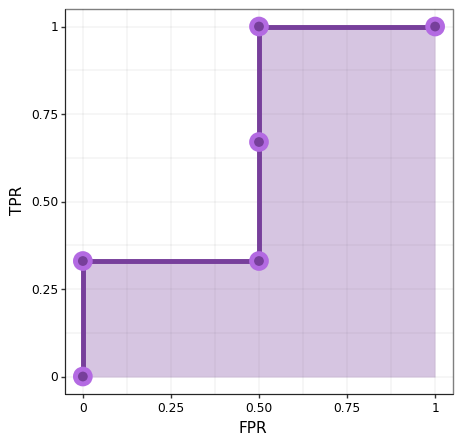

<ggplot: (8742447219745)>

In [ ]:
fig = (
    ggplot(data = final_roc_coordinates,
          mapping = aes(x = 'FPR', y = 'TPR')) +
     geom_polygon(data = pd.concat([final_roc_coordinates, pd.DataFrame({'FPR':1, 'TPR':0}, index=[1.0])]), alpha = 0.3, fill = '#773F9B') + 
     geom_path(aes(x='FPR', y='TPR'), group=1, colour = '#773F9B', size = 2) +
     geom_point(colour = '#B36AE2', 
                shape = 'o',
                fill = '#773F9B', 
                size = 4.0,
                stroke = 2.0) +
    labs(
        title ='',
        x = 'FPR',
        y = 'TPR',
    ) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
    )
fig

Let's calculate **AUC** using *sklearn*:

In [ ]:
np.round(metrics.roc_auc_score(example_data['class'], example_data['scores']),3)

0.667

### ROC for majority class classifier
Let's see how ROC would look like in the case of highly skewed prediction on unbalanced data.


In [ ]:
# regenerate unbalanced data
unbalanced_data = pd.DataFrame({'x1':[1,2,3,4,5,1,4,3,4.5,3.5], 'x2':[2,4,5,4,5,3.5,4.2,1.3,0.5,3], 'class':[1,0,1,1,1,1,1,1,1,1]})
unbalanced_data['class'] = unbalanced_data['class'].astype('category') # note that we turn class into categories

Extract scores from the majority class model on unbalanced data

In [ ]:
majority_class_model = DummyClassifier(strategy='most_frequent')
majority_class_model.fit(unbalanced_data[["x1" , "x2"]], unbalanced_data[["class"]])
majority_class_model.predict_proba(unbalanced_data[["x1" , "x2"]])

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
majority_class_model.predict_proba(unbalanced_data[["x1" , "x2"]])[:,1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
unbalanced_data['scores'] = majority_class_model.predict_proba(unbalanced_data[["x1" , "x2"]])[:,1]
unbalanced_data

,x1,x2,class,scores
0,1.0,2.0,1,1.0
1,2.0,4.0,0,1.0
2,3.0,5.0,1,1.0
3,4.0,4.0,1,1.0
4,5.0,5.0,1,1.0
5,1.0,3.5,1,1.0
6,4.0,4.2,1,1.0
7,3.0,1.3,1,1.0
8,4.5,0.5,1,1.0
9,3.5,3.0,1,1.0


In [ ]:
def generate_coordinates(scores, classes, verbose = True):
  # thresholds can be obtained from scores
  thresholds = scores.unique()

  # initialise lists
  tprs = []
  fprs = []
  
  ##### YOUR CODE STARTS #####
  for threshold in thresholds:
    if (verbose == True):
      print(f'For threshold {threshold}')
    
    predictions = scores >= threshold
    pred_positive = classes[predictions == 1].to_numpy().flatten()
    pred_negative = classes[predictions == 0].to_numpy().flatten()
    
    tp = np.sum(pred_positive == 1)
    fn = np.sum(pred_negative == 1)
    tn = np.sum(pred_positive == 0)
    fp = np.sum(pred_negative == 0)
    
    if (verbose == True):
      print(f'tp = {tp}, fn = {fn}, tn = {tn}, fp = {fp}')
    
    tpr = tp/(tp + fn) # the same as recall
    fpr = fp/(tn + fp)
    
    if (verbose == True):
      print(f'FPR = {np.round(fpr, 2)}, TPR = {np.round(tpr, 2)}\n')
    
    tprs.append(tpr)
    fprs.append(fpr)

  roc_coordinates = pd.DataFrame({'FPR': np.round(fprs, 2), 'TPR': np.round(tprs, 2)}, index=thresholds)

  ##### YOUR CODE ENDS #####
  return roc_coordinates

In [ ]:
dummy_roc_coordinates = generate_coordinates(unbalanced_data['scores'], unbalanced_data['class'])

For threshold 1.0
tp = 9, fn = 0, tn = 1, fp = 0
FPR = 0.0, TPR = 1.0



In [ ]:
# Concat with old DataFrame and reset the Index.
top_row =  pd.DataFrame({'FPR':0, 'TPR':0}, index=[1.0])
final_dummy_roc_coordinates = pd.concat([top_row, dummy_roc_coordinates])
final_dummy_roc_coordinates

,FPR,TPR
1.0,0.0,0.0
1.0,0.0,1.0


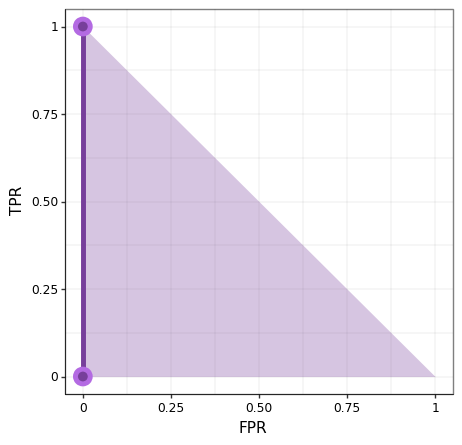

<ggplot: (8742447233441)>

In [ ]:
fig = (
    ggplot(data = final_dummy_roc_coordinates,
          mapping = aes(x = 'FPR', y = 'TPR')) +
     geom_polygon(data = pd.concat([final_dummy_roc_coordinates, pd.DataFrame({'FPR':1, 'TPR':0}, index=[1.0])]), alpha = 0.3, fill = '#773F9B') + 
     geom_path(aes(x='FPR', y='TPR'), group=1, colour = '#773F9B', size = 2) +
     geom_point(colour = '#B36AE2', 
                shape = 'o',
                fill = '#773F9B', 
                size = 4.0,
                stroke = 2.0) +
    labs(
        title ='',
        x = 'FPR',
        y = 'TPR',
    ) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
    )
fig

In [ ]:
np.round(metrics.roc_auc_score(unbalanced_data['class'], unbalanced_data['scores']),3)

0.5

## You can compare classifiers by plotting their ROCs

In [ ]:
def plot_roc(coordinates_dict):
  """
  plot_roc function plots all models' ROCs on one plot
  """
  plotting_data = pd.DataFrame(columns=['FPR', 'TPR', 'Method'])

  for id, name in enumerate(coordinates_dict.keys()):
    method_data = coordinates_dict[name]
    method_data['Method'] = name
    plotting_data = pd.concat([plotting_data, method_data])
  
  plotting_data['Method'] = pd.Categorical(plotting_data['Method'])
  
  # To those of you who are interested in what the hell is going on
  # check the comments for each line:
  roc_plot = (
        ggplot(data = plotting_data, # creates a canvas
        mapping = aes(x = 'FPR', y = 'TPR', colour = 'Method')) + # specifies dimensions
        geom_path(size = 1.5) + # determines geometric primitive to be visualised (path/line in our case) and its thickness 
        labs(title ='', x = 'FPR', y = 'TPR') + # labels of the x and y axes
        # this is all for the figure, beloow are only formatting specs
        theme_bw() + # colour schema 
        theme(figure_size = (5, 5), # figure size
              axis_line = element_line(size = 0.5, colour = "black"), 
              panel_grid_major = element_line(size = 0.05, colour = "black"),
              panel_grid_minor = element_line(size = 0.05, colour = "black"),
              axis_text = element_text(colour ='black')) # more formatting details 
      )
  return roc_plot


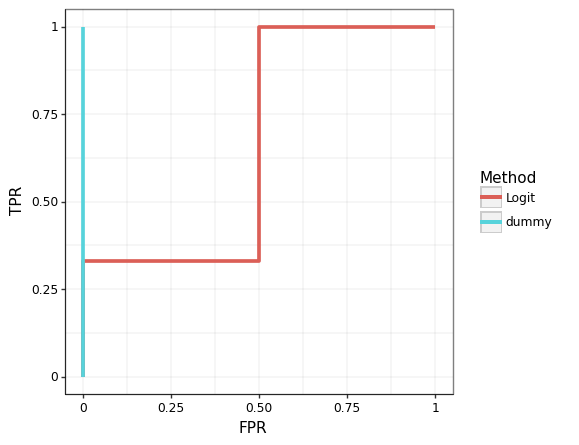

<ggplot: (8742447199113)>

In [ ]:
plot_roc(dict({'dummy': final_dummy_roc_coordinates,
               'Logit': final_roc_coordinates}))

### ROC in Sklearn 

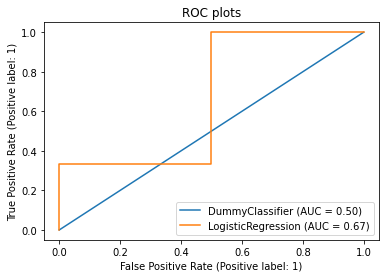

In [ ]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

# Re-fitting on example_data instead of unbalanced_data
majority_class_model.fit(example_data[["x1" , "x2"]], example_data[["class"]])
logit.fit(example_data[['x1','x2']], example_data['class'])

# No predictions are required only the model object
fig, ax = plt.subplots()
plot_roc_curve(majority_class_model, example_data[['x1','x2']], example_data['class'], ax=ax) 
plot_roc_curve(logit, example_data[['x1','x2']], example_data['class'], ax=ax) 
ax.set_title('ROC plots')
plt.show() 